# Gaussian Process

In [242]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import sys
sys.path.insert(0,'/Users/eman/Documents/code_projects/kernellib/')

# from kernellib.gp import GaussianProcessRegressor
from kernellib.kernels import ARD, ConstantKernel as C, WhiteKernel
from kernellib.gpr import GaussianProcessRegressor

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
random_state = 123
rng = np.random.RandomState(random_state)

# Training data is 11 points in [0,1] inclusive regularly spaced# Traini 
x_train = np.linspace(0, 1, 11).reshape(-1, 1)
# True function is sin(2*pi*x) with Gaussian noise
y_train = np.sin(x_train * (2 * np.pi)) + rng.randn(x_train.shape[0], 1) * 0.25
y_train = np.squeeze(y_train)
x_test = np.linspace(0, 1, 51).reshape(-1, 1)
print(x_train.shape, y_train.shape)

(11, 1) (11,)


In [244]:
kernel = C() * ARD(length_scale=1.0) + WhiteKernel(noise_level=0.1)
 
gp_model = GaussianProcessRegressor(kernel=kernel, random_state=random_state, n_restarts_optimizer=5)
gp_model.fit(x_train, y_train)

print(gp_model.kernel_)

0.638**2 * ARD(length_scale=0.205) + WhiteKernel(noise_level=0.163)


### Testing ARD Kernel

In [245]:
def ax_plot_sklearn(ax, y_pred, title):
    
    # get the condifence intervals
    lower, upper = y_pred - y_err, y_pred + y_err
    # plot the training data
    ax.plot(x_train, y_train, 'r*')
    
    # plot the predictive mean
    ax.plot(x_test, y_pred, 'b')
    
    # plot the confidence bounds
    ax.fill_between(x_test.squeeze(), lower.squeeze(), upper.squeeze(), alpha=0.5, color='orange')
    
    ax.set_ylim([-3, 3])
    ax.legend(['Observed Data', 'Mean', 'Confidence'])
    
    ax.set_title(title)
    
    return None

In [246]:
y_pred = gp_model.predict(x_test)
y_pred, y_err = gp_model.predict(x_test, return_std=True)


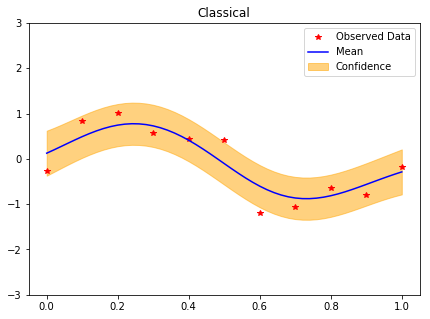

In [247]:
f, ax = plt.subplots(1, 1, figsize=(7,5))

ax_plot_sklearn(ax, y_pred, 'Classical')